In [72]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class']=cancer.target
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: int32

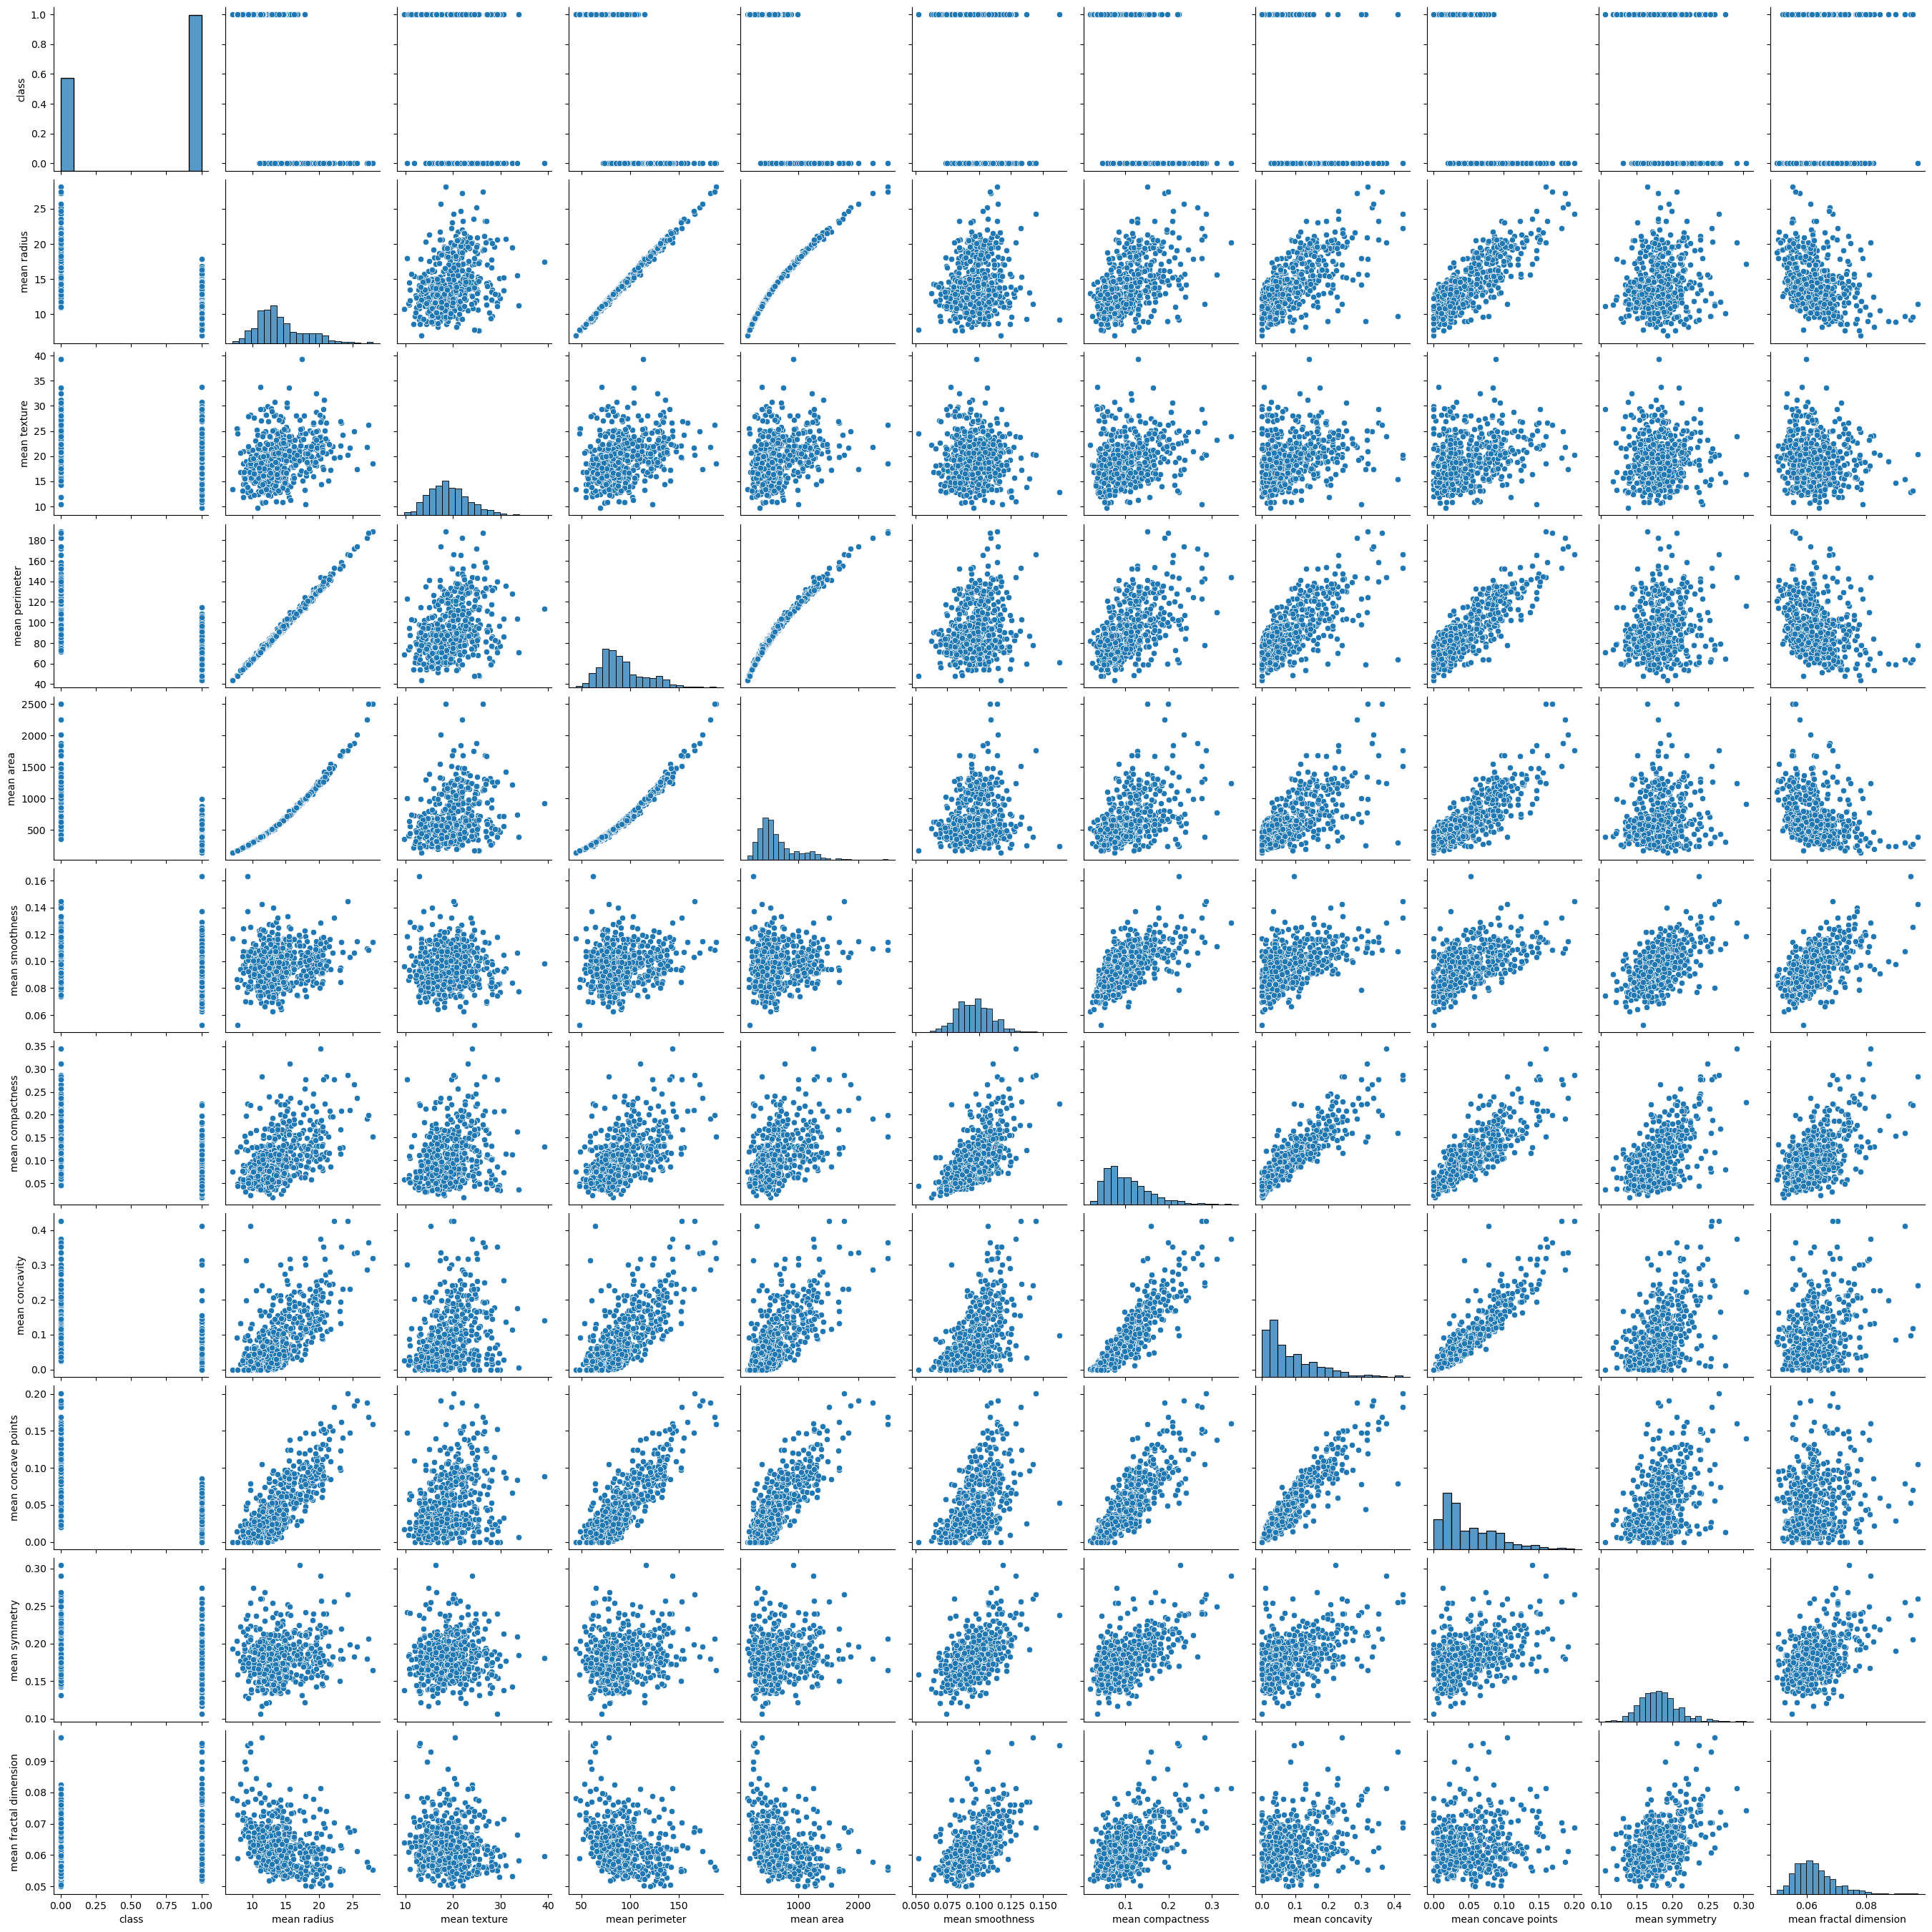

In [75]:
sns.pairplot(df[['class']+list(df.columns[:10])])

In [76]:
cols = ["mean radius", "mean texture",
        "mean smoothness", "mean compactness", "mean concave points",
        "worst radius", "worst texture",
        "worst smoothness", "worst compactness", "worst concave points",
        "class"]

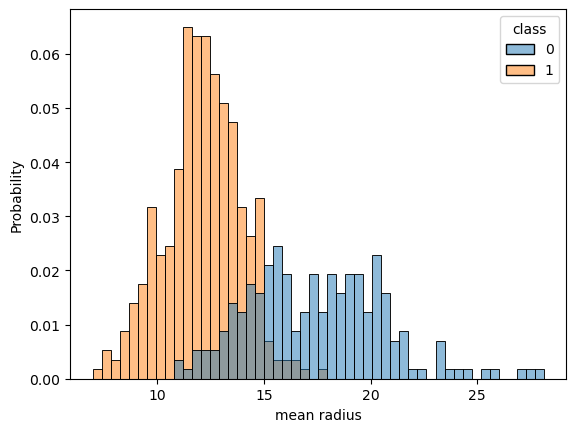

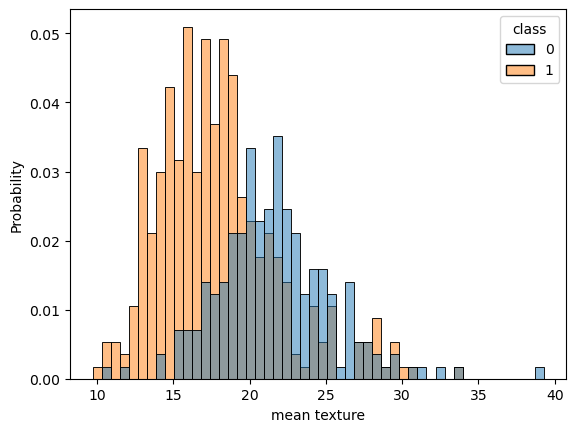

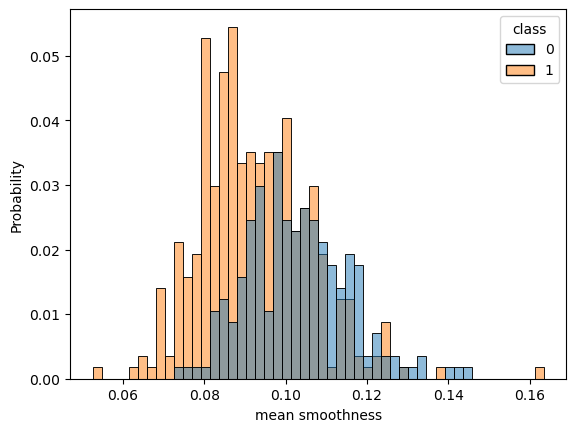

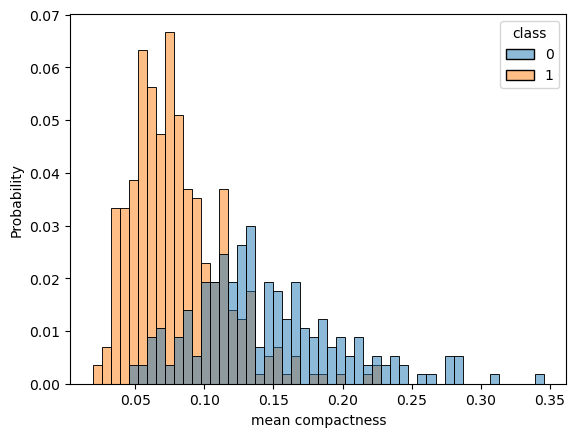

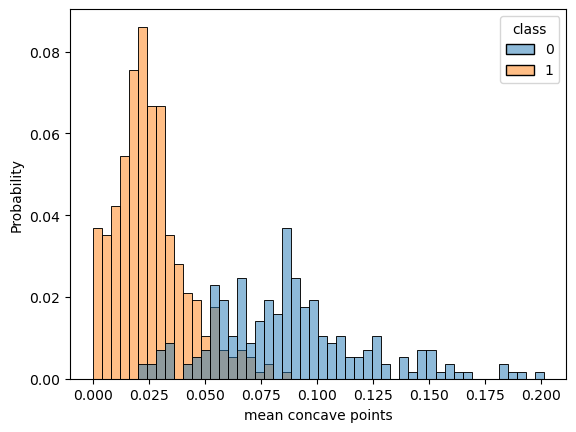

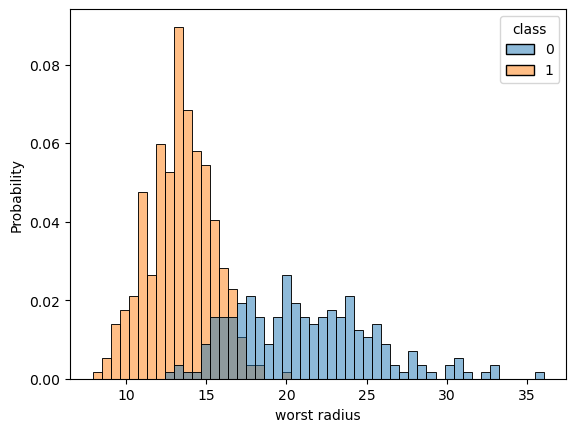

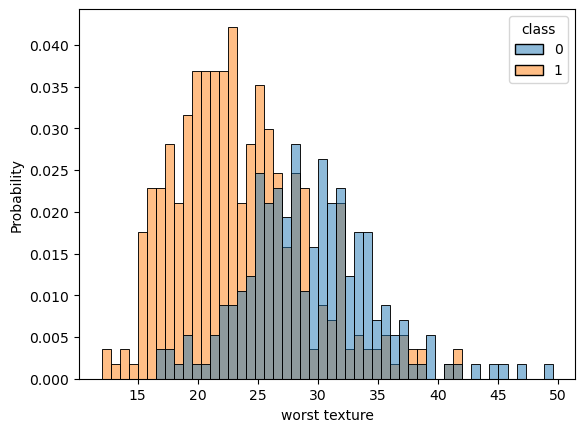

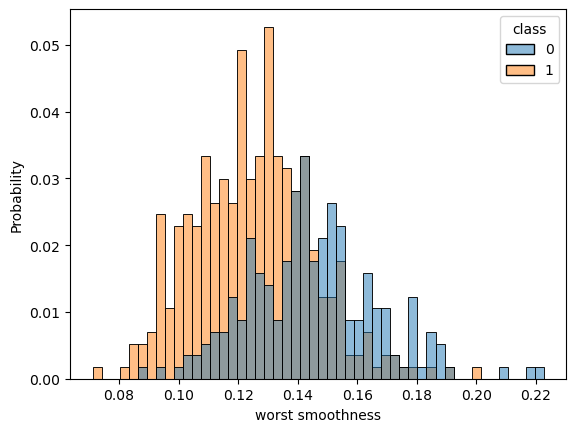

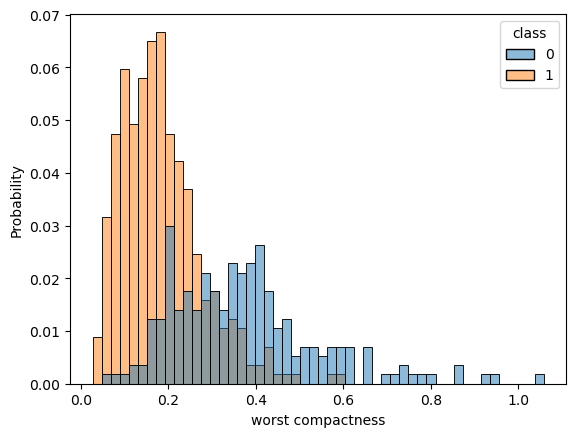

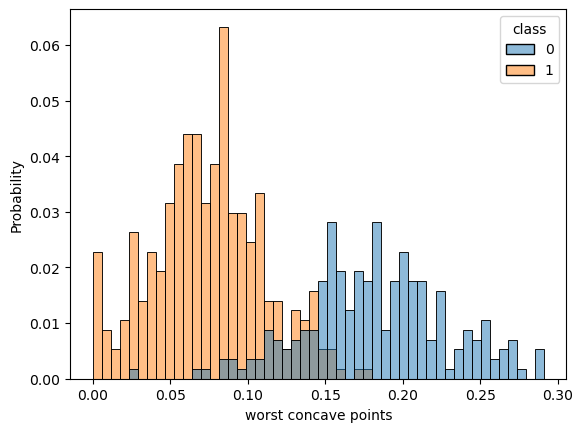

In [77]:
for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [111]:
data=torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([569, 11])

In [118]:
x=data[:,:-1]
y=data[:,-1:]
print(x.shape)
print(y.shape)

torch.Size([569, 10])
torch.Size([569, 1])


In [119]:
n_epochs=200000
learning_rate=1e-2
print_interval=10000

In [120]:
class MyModel(nn.Module) :
    def __init__(self, input_dim, output_dim) :
        self.input_dim=input_dim
        self.output_dim=output_dim

        super().__init__()

        self.linear=nn.Linear(input_dim,output_dim)
        self.act =nn.Sigmoid()
    
    def forward(self, x) :
        y = self.act(self.linear(x))
        return y

In [121]:
model = MyModel(input_dim=x.size(-1), output_dim=y.size(-1))
crit =nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [122]:
for i in range(n_epochs) :
    y_hat = model(x)
    loss = crit(y_hat,y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0:
        print('epoch:',(i+1),'loss:',loss.item())

epoch: 10000 loss: 0.278150349855423
epoch: 20000 loss: 0.22907811403274536
epoch: 30000 loss: 0.1998508870601654
epoch: 40000 loss: 0.18080627918243408
epoch: 50000 loss: 0.16751518845558167
epoch: 60000 loss: 0.1577354520559311
epoch: 70000 loss: 0.15023988485336304
epoch: 80000 loss: 0.1443079113960266
epoch: 90000 loss: 0.1394934356212616
epoch: 100000 loss: 0.13550321757793427
epoch: 110000 loss: 0.13213849067687988
epoch: 120000 loss: 0.12926095724105835
epoch: 130000 loss: 0.12677115201950073
epoch: 140000 loss: 0.12459132820367813
epoch: 150000 loss: 0.1226649060845375
epoch: 160000 loss: 0.1209525316953659
epoch: 170000 loss: 0.11941612511873245
epoch: 180000 loss: 0.11803025752305984
epoch: 190000 loss: 0.11677157133817673
epoch: 200000 loss: 0.11561943590641022


In [125]:
correct_cnt=(y==(y_hat>5)).sum()
total_count=float(y.size(0))
print('Accuracy:%.4f'%(correct_cnt/total_count))

Accuracy:0.3726


In [126]:
df=pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=['y','y_hat'])
df

,y,y_hat
0,0.0,3.378962e-06
1,0.0,9.871954e-04
2,0.0,6.038743e-04
3,0.0,1.504322e-02
4,0.0,8.496790e-02
...,...,...
564,0.0,5.031329e-04
565,0.0,8.335786e-04
566,0.0,4.601306e-02
567,0.0,8.787101e-07


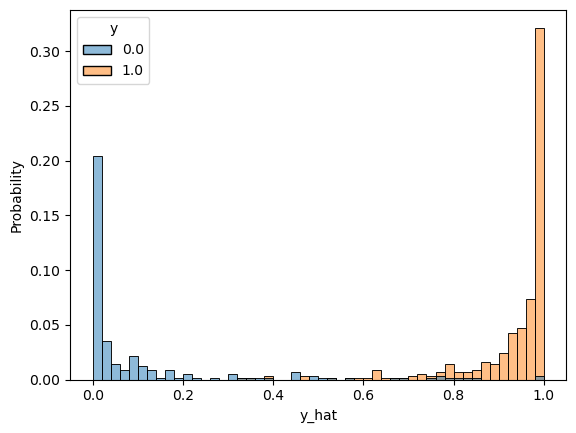

In [127]:
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()